In [1]:
import pandas as pd
from pandasql import sqldf

# reading jsonl file to dataframe
df_jsonl = pd.read_json('./data/Jobs_NYC_Postings.jsonl', orient='records', lines=True)
pd.get_option("display.max_columns")
pd.get_option("display.max_colwidth")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 100)

df_jsonl[0:1]

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,606346,DEPARTMENT FOR THE AGING,External,1,Business Operations Analyst,ASSOCIATE STAFF ANALYST,Competitive-1,12627,00,"Administration & Human Resources Technology, Data & Innovation Policy, Research & Analysis",F,Experienced (non-manager),70611.0,81203.0,Annual,"2 Lafayette St., N.Y.",Human Resources,The Office of Human Resources (OHR) seeks a highly motivated individual to serve as a Business O...,"1. A masterâs degree from an accredited college or university, accredited by regional, nationa...",â¢ Project management experience and expertise is a plus. â¢ Self-starter; works independently...,0,Please be sure to submit a resume & cover letter when applying. All current City Employees may a...,0,0,0,"New York City residency is generally required within 90 days of appointment. However, City Emplo...",09/28/2023,27-DEC-2023,09/29/2023,11/20/2023


# plt.scatter

In [2]:
query1 = """
select "# Of Positions" as numofpositions, "Salary Range From" as salaryrangefrom, "Salary Range To" as salaryrangeto
from df_jsonl
"""
result1 = sqldf(query1, locals())
result1

,numofpositions,salaryrangefrom,salaryrangeto
0,1,70611.0,81203.0
1,1,72038.0,192152.0
2,1,65604.0,83399.0
3,2,60793.0,69912.0
4,1,39763.0,64420.0
...,...,...,...
6181,1,48612.0,76735.0
6182,1,92301.0,106146.0
6183,1,82506.0,94882.0
6184,1,70611.0,83109.0


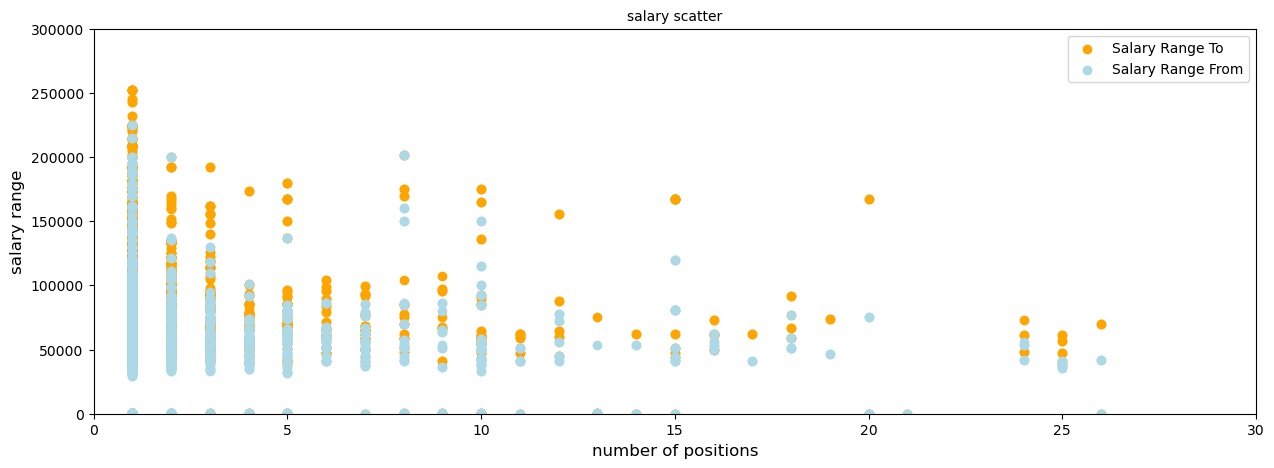

In [15]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 15, 5 # Graph Size (width, height)
plt.tight_layout() # Function to prevent graphs from overlapping each other

plt.xlabel("number of positions", fontsize=12) # x-axis label
plt.ylabel("salary range", fontsize=12) # y-axis label
plt.title("salary scatter", fontsize=10)

plt.xlim(0, 30) # x-axis range
plt.ylim(0, 300000) # y-axis range

plt.scatter(result1['numofpositions'], result1['salaryrangeto'], color='orange', label='Salary Range To')
plt.scatter(result1['numofpositions'], result1['salaryrangefrom'], color='lightblue', label='Salary Range From')

plt.legend(loc='upper right') # legend location
plt.show()

# plt.bar

In [20]:
query2 = """
select "# Of Positions", avg("Salary Range From"), avg("Salary Range To")
from df_jsonl 
group by "# Of Positions";
"""
result2 = sqldf(query2, locals())
result2.rename(columns={'# Of Positions': 'numofpositions', 'avg("Salary Range From")': 'avgsalaryrangefrom', 'avg("Salary Range To")': 'avgsalaryrangeto'}, inplace=True)
result2[0:5]

,numofpositions,avgsalaryrangefrom,avgsalaryrangeto
0,1,65358.909568,91157.134605
1,2,56608.387874,76227.502824
2,3,56153.761908,73673.753389
3,4,50019.172422,63026.389348
4,5,53529.162222,78784.328000


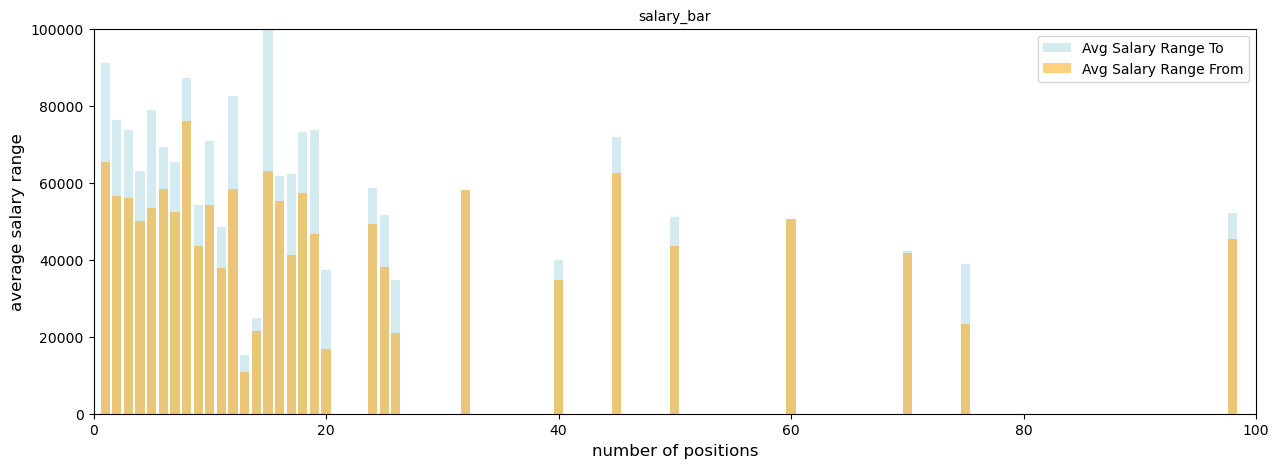

In [29]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 15, 5 # Graph Size (width, height)
plt.xlabel("number of positions", fontsize=12) # x-axis label
plt.ylabel("average salary range", fontsize=12) # y-axis label
plt.title("salary_bar", fontsize=10)

plt.xlim(0, 100) # x-axis range
plt.ylim(0, 100000) # y-axis range

plt.bar(result2.loc[:,"numofpositions"], result2.loc[:,"avgsalaryrangeto"], color='lightblue', alpha=0.5, label='Avg Salary Range To')
plt.bar(result2.loc[:,"numofpositions"], result2.loc[:,"avgsalaryrangefrom"], color='orange', alpha=0.5, label='Avg Salary Range From')

plt.legend(loc='upper right') # legend location
plt.show()


# ax.bar

In [76]:
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import pandas as pd
from pylab import rcParams
import numpy as np

max_pos = max(result2.loc[:,"numofpositions"])
x = np.arange(round(max_pos, -1)+1)
df_x = pd.DataFrame(x, columns=["x"])

query3 = """
select df_X.x, result2.avgsalaryrangefrom, result2.avgsalaryrangeto
from df_x left outer join result2 on df_x.x = result2.numofpositions;
"""
result3 = sqldf(query3, locals())
result3.rename(columns={'x': 'numofpositions', 'avgsalaryrangefrom': 'avgsalaryrangefrom', 'avgsalaryrangeto': 'avgsalaryrangeto'}, inplace=True)
result3.fillna(0, inplace=True)
result3[0:5]

,numofpositions,avgsalaryrangefrom,avgsalaryrangeto
0,0,0.000000,0.000000
1,1,65358.909568,91157.134605
2,2,56608.387874,76227.502824
3,3,56153.761908,73673.753389
4,4,50019.172422,63026.389348


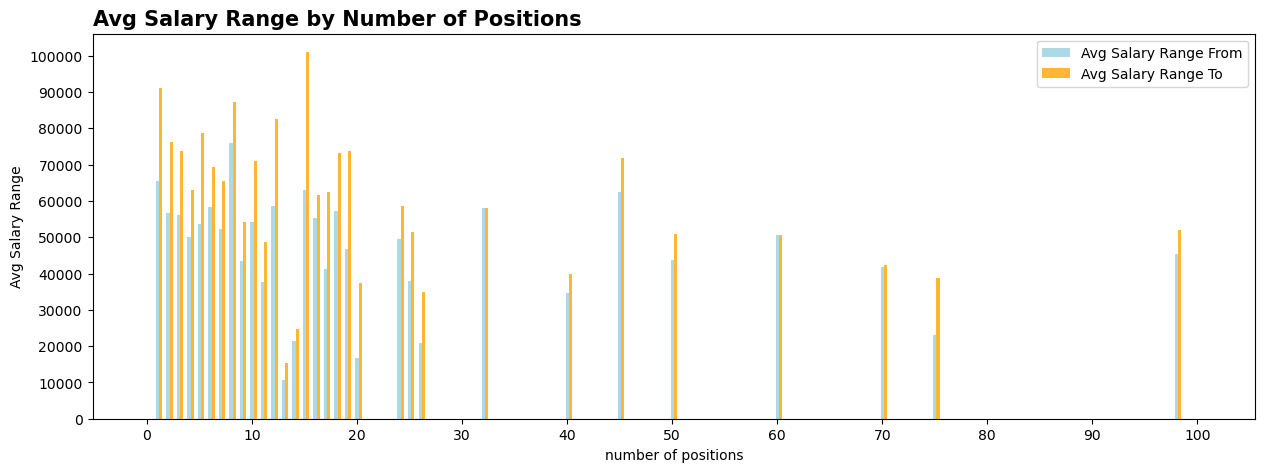

In [97]:
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np

rcParams['figure.figsize'] = 15, 5 # Graph Size (width, height)
bar_width = 0.3

numofpositions_list = result3.loc[:,"numofpositions"].values.tolist()
avgsalaryrangefrom_list = result3.loc[:,"avgsalaryrangefrom"].values.tolist()
avgsalaryrangeto_list = result3.loc[:,"avgsalaryrangeto"].values.tolist()

numofpositions_list_2 = [x + bar_width for x in numofpositions_list]

fig, ax = plt.subplots()
ax.bar(numofpositions_list, avgsalaryrangefrom_list, bar_width, color='lightblue', alpha=1.0, label='Avg Salary Range From')
ax.bar(numofpositions_list_2, avgsalaryrangeto_list, bar_width, color='orange', alpha=0.8, label='Avg Salary Range To')

ax.set_xlabel('number of positions')
ax.set_ylabel('Avg Salary Range')
ax.set_title('Avg Salary Range by Number of Positions', loc='left', color='black', fontsize=15, fontweight='bold')

ax.set_xticks(np.arange(0, round(max_pos, -1)+1, 10))
ax.set_yticks(np.arange(0, 110000, 10000))

ax.legend()
ax.plot()
plt.show()

# ax.hist

In [99]:
query4 = """
select "# Of Positions" as numofpositions, "Salary Range From" as salaryrangefrom, "Salary Range To" as salaryrangeto
from df_jsonl
"""
result4 = sqldf(query4, locals())
result4[0:3]

,numofpositions,salaryrangefrom,salaryrangeto
0,1,70611.0,81203.0
1,1,72038.0,192152.0
2,1,65604.0,83399.0


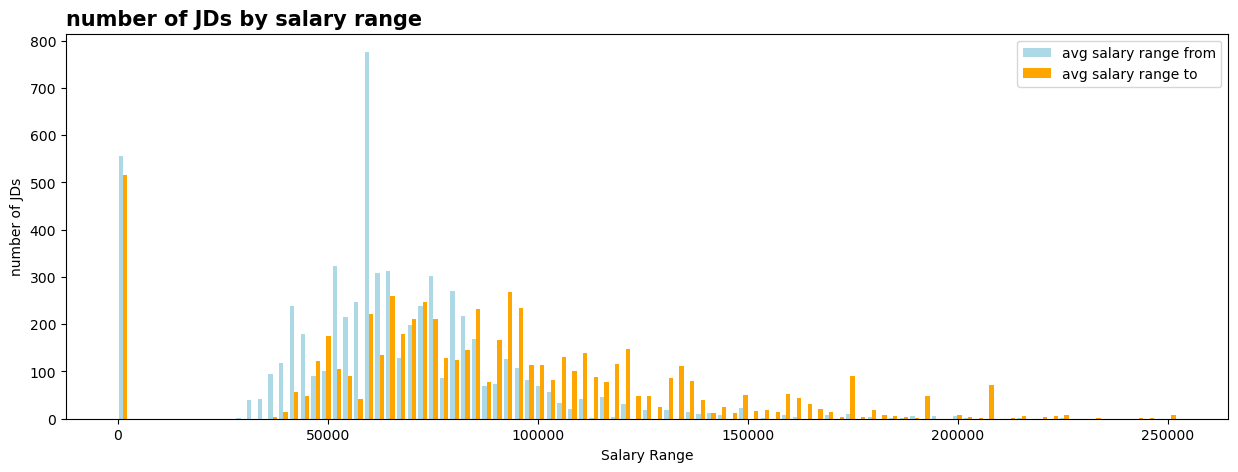

In [107]:
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np

rcParams['figure.figsize'] = 15, 5 # Graph Size (width, height)
bar_width = 0.3

# numofpositions_list = result4.loc[:,"numofpositions"].values.tolist()
salaryrangefrom_list = result4.loc[:,"salaryrangefrom"].values.tolist()
salaryrangeto_list = result4.loc[:,"salaryrangeto"].values.tolist()

bins = np.linspace(0, max(salaryrangeto_list), 100)

fig, ax = plt.subplots()
ax.hist([salaryrangefrom_list, salaryrangeto_list], bins, color=['lightblue', 'orange'], alpha=1.0, label=["avg salary range from", "avg salary range to"])

ax.set_xlabel('Salary Range')
ax.set_ylabel('number of JDs')
ax.set_title('number of JDs by salary range', loc='left', color='black', fontsize=15, fontweight='bold')

ax.set_xticks(np.arange(0, 300000, 50000))

ax.legend()
ax.plot()
plt.show()

# fig.add_subplot

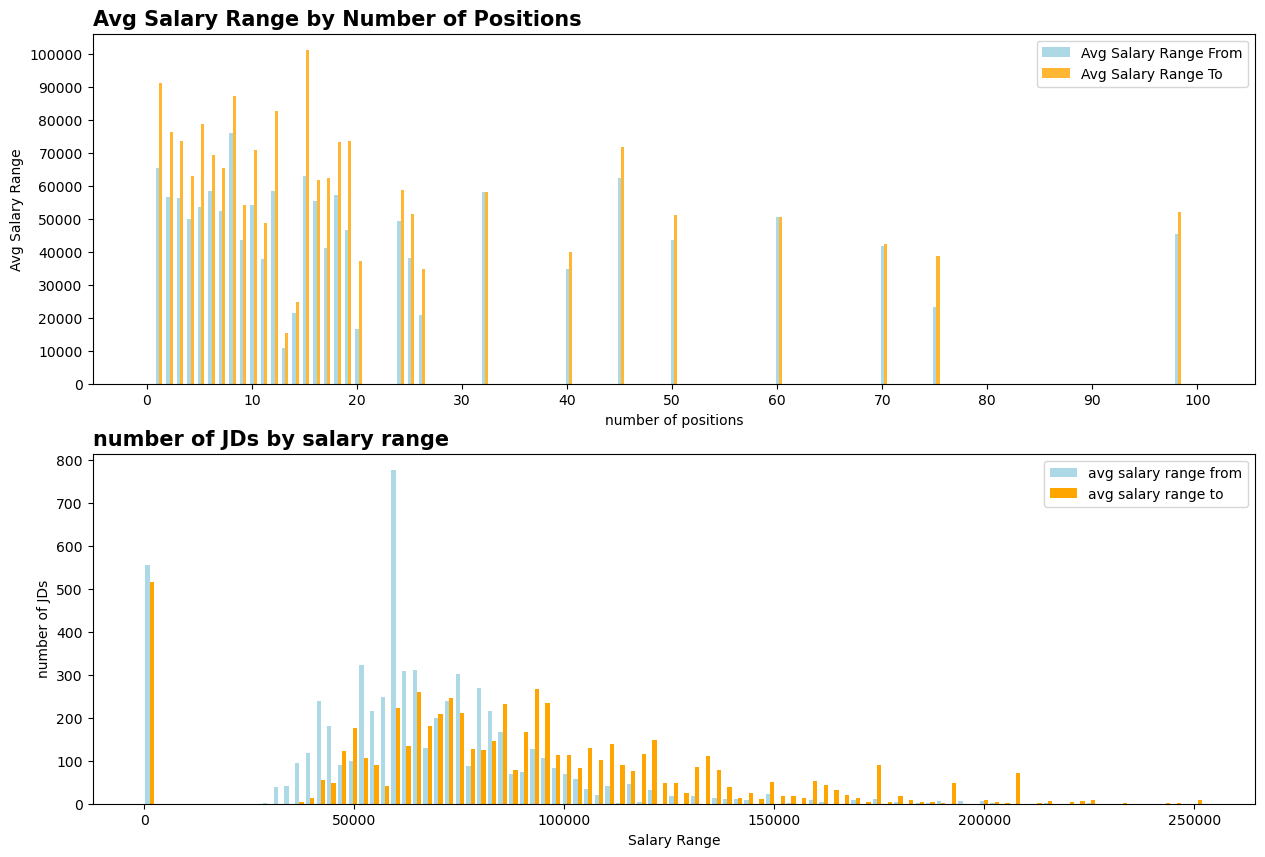

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# figsize is in inches, 1 inch = 2.54 cm, width, height
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# -------------------------------- ax1 --------------------------------
ax1.bar(numofpositions_list, avgsalaryrangefrom_list, bar_width, color='lightblue', alpha=1.0, label='Avg Salary Range From')
ax1.bar(numofpositions_list_2, avgsalaryrangeto_list, bar_width, color='orange', alpha=0.8, label='Avg Salary Range To')

ax1.set_xlabel('number of positions')
ax1.set_ylabel('Avg Salary Range')
ax1.set_title('Avg Salary Range by Number of Positions', loc='left', color='black', fontsize=15, fontweight='bold')

ax1.set_xticks(np.arange(0, round(max_pos, -1)+1, 10))
ax1.set_yticks(np.arange(0, 110000, 10000))

ax1.legend()
ax1.plot()

# -------------------------------- ax2 --------------------------------
ax2.hist([salaryrangefrom_list, salaryrangeto_list], bins, color=['lightblue', 'orange'], alpha=1.0, label=["avg salary range from", "avg salary range to"])

ax2.set_xlabel('Salary Range')
ax2.set_ylabel('number of JDs')
ax2.set_title('number of JDs by salary range', loc='left', color='black', fontsize=15, fontweight='bold')

ax2.set_xticks(np.arange(0, 300000, 50000))

ax2.legend()
ax2.plot()

# -------------------------------- plt --------------------------------
plt.show()

# template

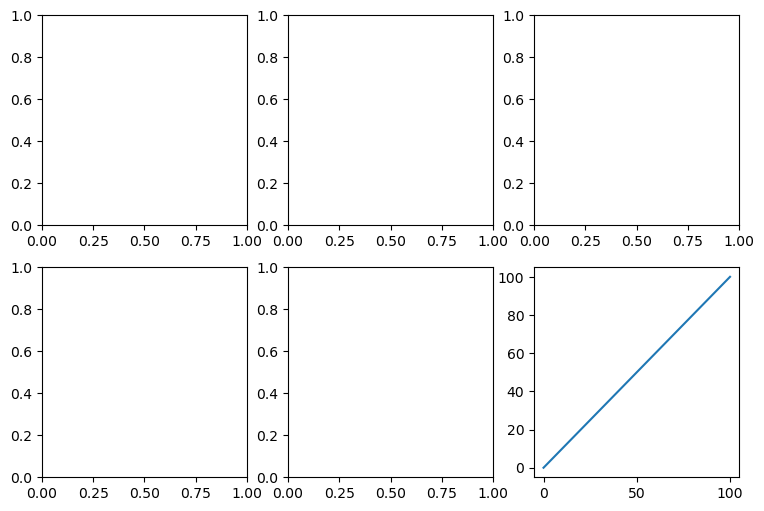

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# figsize is in inches, 1 inch = 2.54 cm, width, height
fig = plt.figure(figsize=(9, 6))

# grid 2x3, 6 subplots
ax = fig.add_subplot(2, 3, 6)

# linspace returns evenly spaced numbers over a specified interval (start, stop, num=50)
x = np.linspace(0, 100)
y = x
ax.plot(x, y)

# space subplots
for i in range(6):
    if i != 5:
        fig.add_subplot(2, 3, i+1)
    
plt.show()